<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio NLP + Sist. Recomendación


En este laboratorio, tabrajaras con datos de reseñas de productos para construir un sistema de recomendación que utilice procesamiento de lenguaje natural (NLP) y *machine learning*. El objetivo principal es que analices el contenido textual de las reseñas, clasifiques las opiniones en categorías (positiva, negativa o neutra) y aproveches esta información para personalizar las recomendaciones. El sistema priorizará los productos con mejores reseñas para usuarios específicos y permitirá evaluar si el análisis de sentimientos mejora la calidad de las recomendaciones. Tareas propuestas:


**Caso 1: Crear un sistema de recomendación**: Debes generar un sistema de recomendación para priorizar productos con las reseñas para cada usuario. Los pasos que deberás seguir son:    

- Estructurar el conjunto de datos

- Sistema basado en contenido


**Caso 2: Clasificar reseñas en positivas, negativas o neutras** Deberás implementar un modelo para analizar las reseñas textuales y clasificarlas en tres categorías:

- Positivas: Si el sentimiento de la reseña es favorable.

- Negativas: Si el sentimiento de la reseña es desfavorable.

- Neutras: Si la reseña no tiene un sentimiento claro.
	
- Pasos :
	- Preprocesamiento de texto: Limpiar las reseñas eliminando caracteres especiales, palabras vacías (stopwords) y realizar lematización.
	
	- Identificar las reseñas positivas, negativas y neutrales. 


Los datos los tendréis en el [siguiente enlace](https://drive.google.com/drive/u/0/folders/1vK5zESy9KElRhm_utg_lHHXuUArrwWgu) con la descipción de cada una de las columnas.  

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import os 
import sys

sys.path.append("../")
# Importamos las clases
# -----------------------------------------------------------------------
from src import soporte_nlp as sn

# Configuración de pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

# para no tener que hacer el restart del codigo todo el rato
# -----------------------------------------------------------------------
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\develop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\develop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv("../data/datos.csv", index_col = 0)
df.head(2)


reviewId                                        reviewDate  \
65115   RXDM4W1ZL7L4L    Reviewed in the United States on June 22, 2021   
56720  R2GINAKQJOSWEL  Reviewed in the United States on August 27, 2021   

            mainDepartment       subDepartment  \
65115  Sports and Outdoors  Outdoor Recreation   
56720            Computers      Men's Clothing   

                                             productName  \
65115  Doctor Developed Copper Wrist Brace / Carpal T...   
56720      Fruit of the Loom Men's Coolzone Boxer Briefs   

                      reviewTitle  reviewStar  \
65115  One size does not fit all.         3.0   
56720   They were ok but thats it         4.0   

                                              reviewText  inconsistentStatus  
65115  Nice lightweight brace but unfortunately was t...                   1  
56720  Boxers were ok. The color did start to fade pr...                   0

In [3]:
df = df[['mainDepartment','reviewText']]


In [4]:

# eliminamos las filas con valores nulos para evitar los problemas
df = df.dropna(subset=['mainDepartment']).reset_index(drop = True)

In [5]:
df.head()

mainDepartment                                         reviewText
0       Sports and Outdoors  Nice lightweight brace but unfortunately was t...
1                 Computers  Boxers were ok. The color did start to fade pr...
2                 Computers  Very easy to install. Worked right away but it...
3          Home and Kitchen  The color is completely different than hunter ...
4  Beauty and Personal Care  From reading the reviews, I was hoping that th...

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   mainDepartment  10000 non-null  object
 1   reviewText      9999 non-null   object
dtypes: object(2)
memory usage: 156.4+ KB
None

Descripción del DataFrame:
                count unique        top  freq
mainDepartment  10000      5  Computers  3071
reviewText       9999   9928       Nice     7

Distribución de clases en la columna 'mainDepartment':
mainDepartment
Computers                   3071
Beauty and Personal Care    2104
Electronics                 1747
Home and Kitchen            1662
Sports and Outdoors         1416
Name: count, dtype: int64


d:\workspace\laboratorio-modulo9-leccion06-nlp\notebooks\..\src\soporte_nlp.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


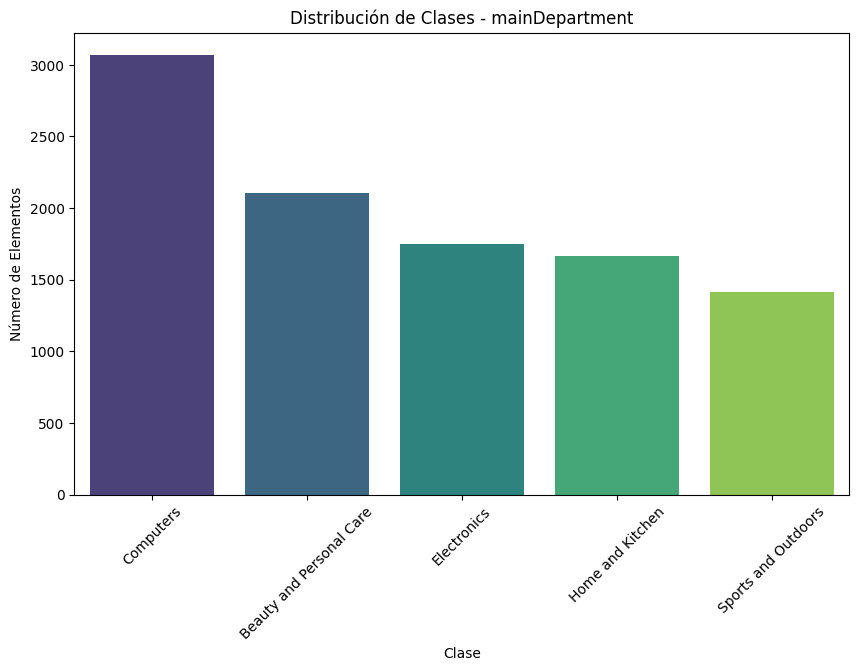

Limpiando el texto...
Texto limpiado y listo.
Generando nubes de palabras...


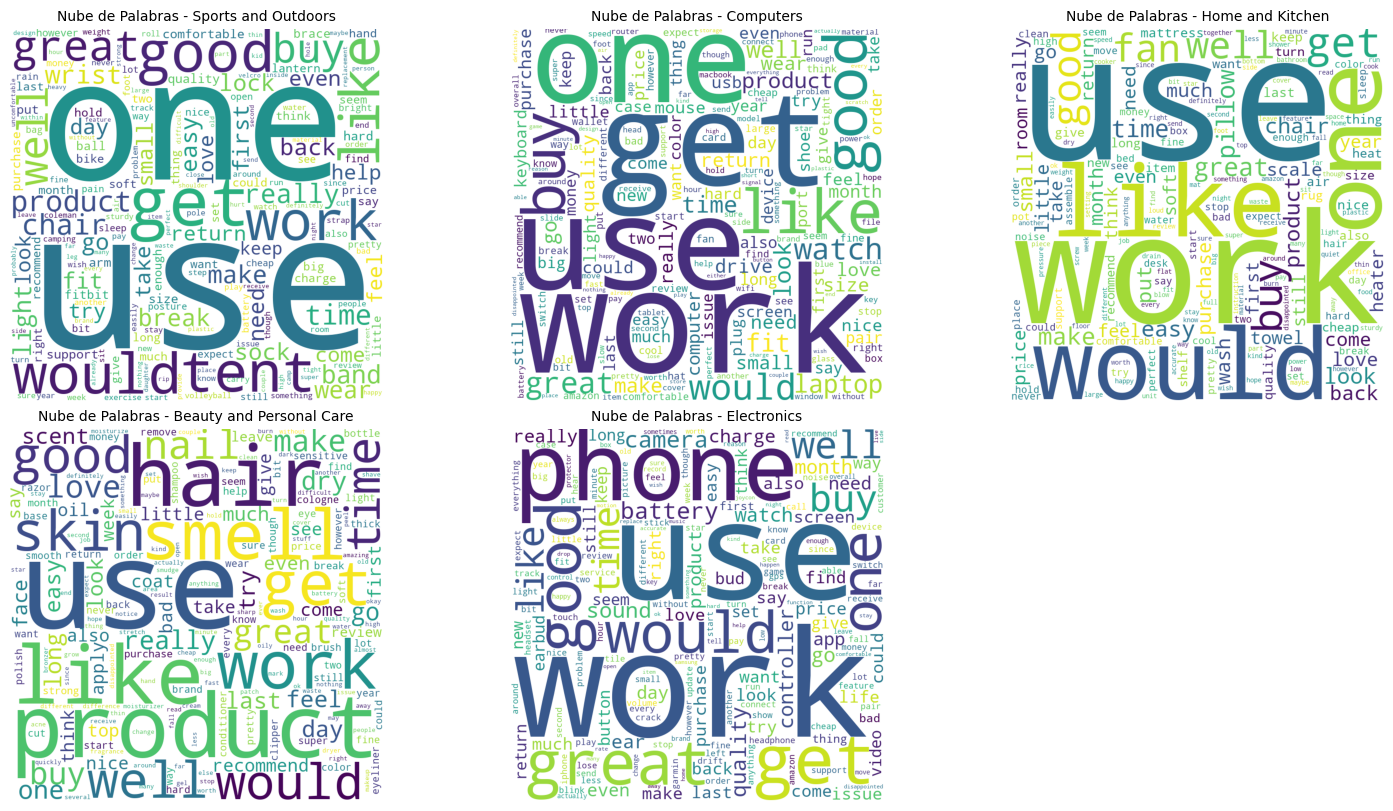

mainDepartment  \
0       Sports and Outdoors   
1                 Computers   
2                 Computers   
3          Home and Kitchen   
4  Beauty and Personal Care   

                                          reviewText  \
0  Nice lightweight brace but unfortunately was t...   
1  Boxers were ok. The color did start to fade pr...   
2  Very easy to install. Worked right away but it...   
3  The color is completely different than hunter ...   
4  From reading the reviews, I was hoping that th...   

                                        cleaned_text  
0  nice lightweight brace unfortunately large wri...  
1  boxer ok color start fade pretty quickly becom...  
2  easy install work right away go far expectedit...  
3  color completely different hunter green andor ...  
4  read review hope shampoo conditioner would ext...

In [6]:
# Instanciar la clase con las columnas relevantes
exploracion = sn.ExploracionText(dataframe=df, text_column='reviewText', label_column='mainDepartment', language="english")

# Explorar los datos
exploracion.explorar_datos()

# Limpiar los textos
exploracion.limpiar_textos("cleaned_text")

# Generar nubes de palabras
exploracion.generar_wordclouds()

# Obtener el DataFrame limpio
df_limpio = exploracion.obtener_dataframe_limpio()

# Ver las primeras filas del DataFrame limpio
df_limpio.head()


In [7]:
# instanciamos la clase
representador = sn.RepresentacionTexto(dataframe=df_limpio, text_column='cleaned_text')

# representamos el texto usando  Bag of Words
bow_df = representador.generar_bow()
print("Bag of Words:")
display(bow_df.sample(10))

# representamos el texto usando TF-IDF
tfidf_df = representador.generar_tfidf()
print("TF-IDF:")
display(tfidf_df.sample(10))

# representammos el texto usando  Embeddings
embeddings_df = representador.generar_embeddings()
print("Embeddings:")
display(embeddings_df.sample(10))


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

d:\develop\Python312\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\develop\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Generando Bag of Words...
Bag of Words generado.
Bag of Words:


mainDepartment  \
7824       Sports and Outdoors   
8246                 Computers   
9001          Home and Kitchen   
5787  Beauty and Personal Care   
178                  Computers   
3185               Electronics   
8763       Sports and Outdoors   
4397                 Computers   
4108          Home and Kitchen   
4359                 Computers   

                                             reviewText  \
7824  The listing says that these socks don't slip. ...   
8246                                 Excelente producto   
9001                              Rather use a crockpot   
5787  I like the way it smells and my wife sure like...   
178                Just what I expected, comfort briefs   
3185  Shattered in less than one week when I dropped...   
8763  We ordered 5 as give-a-way gifts.  We were ver...   
4397                            They fitted fine thanks   
4108  I think that it is a little bit smaller than e...   
4359  Well, it's hard to review.  I plugged it in, a...   

                                           cleaned_text  aa  ability  able  \
7824                       listing say sock slip return   0        0     0   
8246                                 excelente producto   0        0     0   
9001                                rather use crockpot   0        0     0   
5787                  like way smell wife sure like use   0        0     0   
178                                expect comfort brief   0        0     0   
3185  shatter less one week drop phone carpet height...   0        0     0   
8763  order giveaway gift disappointed inflate good ...   0        0     0   
4397                                     fit fine thank   0        0     0   
4108  think little bit small expect fit bowl would h...   0        0     0   
4359             well hard review plug workedend review   0        0     0   

      abrasive  abs  absolute  absolutely  absorb  absorbency  absorbent  \
7824         0    0         0           0       0           0          0   
8246         0    0         0           0       0           0          0   
9001         0    0         0           0       0           0          0   
5787         0    0         0           0       0           0          0   
178          0    0         0           0       0           0          0   
3185         0    0         0           0       0           0          0   
8763         0    0         0           0       0           0          0   
4397         0    0         0           0       0           0          0   
4108         0    0         0           0       0           0          0   
4359         0    0         0           0       0           0          0   

      absurd  abuse  ac  accent  accentuate  accept  acceptable  access  \
7824       0      0   0       0           0       0           0       0   
8246       0      0   0       0           0       0           0       0   
9001       0      0   0       0           0       0           0       0   
5787       0      0   0       0           0       0           0       0   
178        0      0   0       0           0       0           0       0   
3185       0      0   0       0           0       0           0       0   
8763       0      0   0       0           0       0           0       0   
4397       0      0   0       0           0       0           0       0   
4108       0      0   0       0           0       0           0       0   
4359       0      0   0       0           0       0           0       0   

      accessible  accessory  accident  accidental  accidentally  accidently  \
7824           0          0         0           0             0           0   
8246           0          0         0           0             0           0   
9001           0          0         0           0             0           0   
5787           0          0         0           0             0           0   
178            0          0         0           0             0           

Generando representación TF-IDF...
Representación TF-IDF generada.
TF-IDF:


mainDepartment  \
3451                 Computers   
4433  Beauty and Personal Care   
761           Home and Kitchen   
4149                 Computers   
7892                 Computers   
6696                 Computers   
8572                 Computers   
2537                 Computers   
3532  Beauty and Personal Care   
8265          Home and Kitchen   

                                             reviewText  \
3451  Nice tablet, depends what you will use it for....   
4433                  Will buy again...good coverage...   
761   After 5 months, I can't use tare button. It's ...   
4149  I had lost enough weight that I needed to down...   
7892  For some reason when I plugged this in with an...   
6696  USB 3.1 implies that this is a fast USB drive....   
8572  Very impressive. Most of my wallets look like ...   
2537  The first one I received was defective on the ...   
3532  I just love how mild  the smell like a fresh o...   
8265  Very quiet, but don't mistake this for a high-...   

                                           cleaned_text   aa  ability  able  \
3451  nice tablet depend use son say lag trouble run...  0.0      0.0   0.0   
4433                             buy againgood coverage  0.0      0.0   0.0   
761                          month use tare button work  0.0      0.0   0.0   
4149  lose enough weight need downsize color match l...  0.0      0.0   0.0   
7892  reason plug another one hard drive corrupt cor...  0.0      0.0   0.0   
6696  usb imply fast usb drive send first one back r...  0.0      0.0   0.0   
8572  impressive wallet look like episode seinfeldth...  0.0      0.0   0.0   
2537  first one receive defective usb side send back...  0.0      0.0   0.0   
3532     love mild smell like fresh shower type cologne  0.0      0.0   0.0   
8265  quiet mistake highpower summer fan small appea...  0.0      0.0   0.0   

      abrasive  abs  absolute  absolutely  absorb  absorbency  absorbent  \
3451       0.0  0.0       0.0    0.000000     0.0         0.0        0.0   
4433       0.0  0.0       0.0    0.000000     0.0         0.0        0.0   
761        0.0  0.0       0.0    0.000000     0.0         0.0        0.0   
4149       0.0  0.0       0.0    0.000000     0.0         0.0        0.0   
7892       0.0  0.0       0.0    0.134616     0.0         0.0        0.0   
6696       0.0  0.0       0.0    0.000000     0.0         0.0        0.0   
8572       0.0  0.0       0.0    0.000000     0.0         0.0        0.0   
2537       0.0  0.0       0.0    0.000000     0.0         0.0        0.0   
3532       0.0  0.0       0.0    0.000000     0.0         0.0        0.0   
8265       0.0  0.0       0.0    0.000000     0.0         0.0        0.0   

      absurd  abuse   ac  accent  accentuate  accept  acceptable  access  \
3451     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
4433     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
761      0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
4149     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
7892     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
6696     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
8572     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
2537     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
3532     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
8265     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   

      accessible  accessory  accident  accidental  accidentally  accidently  \
3451         0.0        0.0       0.0         0.0           0.0         0.0   
4433         0.0        0.0       0.0         0.0           0.0         0.0   
761          0.0        0.0       0.0         0.0           0.0         0.0   
4149         0.0        0.0       0.0         0.0           0.0         0.0   
7892         0.0        0.0       0.0         0.0   

Generando embeddings...
Embeddings generados.
Embeddings:


mainDepartment  \
3497  Beauty and Personal Care   
6475          Home and Kitchen   
4702               Electronics   
4178          Home and Kitchen   
3642  Beauty and Personal Care   
100   Beauty and Personal Care   
9656                 Computers   
9707                 Computers   
4728               Electronics   
9653                 Computers   

                                             reviewText  \
3497  Smells like rubbing alcohol, doesn’t even stay...   
6475           NOT comfortable!!!!  Cheap!  Never used!   
4702  They were way too big for my ears and I had a ...   
4178  Used this this bullet one time and it does not...   
3642  Loved this... until it started Coming out in b...   
100   I don't see any difference in my hair using th...   
9656                                  Like the leg fit!   
9707  The drive itself works as intended and I haven...   
4728  These are the worst wish I could get my money ...   
9653     Like that hat but shrinks in the wash real bad   

                                           cleaned_text  embedding_0  \
3497  smell like rub alcohol even stay long smell co...     0.285228   
6475                        comfortable cheap never use     0.181211   
4702  way big ear hard time touch without pause play...    -0.069755   
4178  use bullet one time work anymore outside retur...     0.021183   
3642  love start come big drop would run everything ...     0.148252   
100                     see difference hair use product     0.498755   
9656                                       like leg fit     0.367601   
9707  drive work intend issue yet first order receiv...     0.101350   
4728  bad wish could get money back waste money go r...     0.266692   
9653                      like hat shrink wash real bad     0.662572   

      embedding_1  embedding_2  embedding_3  embedding_4  embedding_5  \
3497     0.013936     0.798622    -0.172556     0.132591    -0.227207   
6475    -0.185654     0.317817     0.149048     0.362034    -0.356898   
4702     0.329743     0.454898    -0.182470     0.438503    -0.017685   
4178    -0.451030     0.622101    -0.169183     0.478127    -0.156303   
3642    -0.334732     0.591285    -0.068595    -0.018931    -0.162999   
100     -0.156161     0.137506    -0.048038     0.171604     0.089749   
9656    -0.343541     0.121911     0.082469     0.037276     0.006347   
9707    -0.008542     0.543881     0.115026     0.006589    -0.113915   
4728    -0.298374     0.481089    -0.233375     0.514887    -0.140888   
9653     0.011063     0.574451     0.100286     0.123588    -0.045295   

      embedding_6  embedding_7  embedding_8  embedding_9  embedding_10  \
3497     0.337181     0.327630     0.332155    -0.047087      0.298335   
6475     0.021800     0.027646     0.523871    -0.311592      0.141268   
4702    -0.039075     0.299210     0.062144    -0.386850      0.317982   
4178     0.415389     0.415210     0.085899    -0.298764     -0.001229   
3642     0.298217     0.131689     0.149288    -0.079485      0.129351   
100      0.212913     0.082087    -0.052517    -0.190951     -0.018400   
9656     0.176489     0.081940    -0.232268    -0.154176      0.244497   
9707     0.222005    -0.006184     0.219081    -0.009619      0.090768   
4728     0.220666     0.387162    -0.111499    -0.119792      0.298076   
9653     0.392464     0.474538    -0.124934    -0.249156      0.301782   

      embedding_11  embedding_12  embedding_13  embedding_14  embedding_15  \
3497     -0.434917      0.110605      0.651404     -0.846991      0.382225   
6475      0.430905     -0.060385     -0.096621     -0.691714     -0.061489   
4702      0.077327      0.272477      0.198263     -1.024998      0.354479   
4178     -0.077836      0.378242      0.476671     -0.648990     -0.059099   
3642     -0.089974      0.062593      0.426634     -0.369962      0.046295   
100       0.105881     -0.081441      0.257745     -0.438766     -0.094803   
9656     -0.159296     -0.094345 

In [8]:
embeddings_df.shape

(10000, 771)

Aplicando PCA para reducir 768 dimensiones a 50 dimensiones...
Reducción completada. Nuevas dimensiones agregadas al DataFrame.


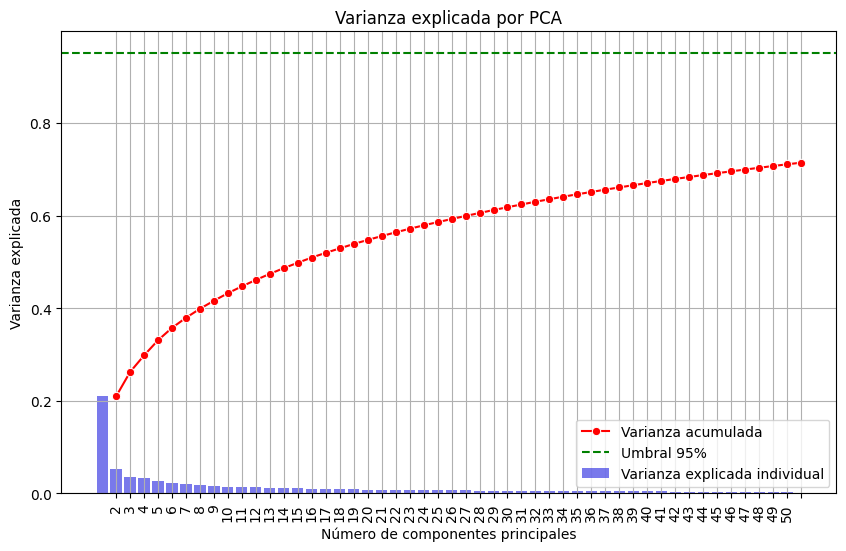

mainDepartment  \
0       Sports and Outdoors   
1                 Computers   
2                 Computers   
3          Home and Kitchen   
4  Beauty and Personal Care   

                                          reviewText  \
0  Nice lightweight brace but unfortunately was t...   
1  Boxers were ok. The color did start to fade pr...   
2  Very easy to install. Worked right away but it...   
3  The color is completely different than hunter ...   
4  From reading the reviews, I was hoping that th...   

                                        cleaned_text  pca_componente_0  \
0  nice lightweight brace unfortunately large wri...          1.738611   
1  boxer ok color start fade pretty quickly becom...          1.355272   
2  easy install work right away go far expectedit...          1.172380   
3  color completely different hunter green andor ...         -0.614810   
4  read review hope shampoo conditioner would ext...          1.649754   

   pca_componente_1  pca_componente_2  pca_componente_3  pca_componente_4  \
0          0.152096          0.534141          1.832110         -0.816322   
1          0.458492         -0.802558         -0.301389         -0.158522   
2          0.192169          1.661863         -0.464872          0.199373   
3          1.366463          0.033115         -0.170324          0.379125   
4          1.405461         -0.461965          1.296250          1.136927   

   pca_componente_5  pca_componente_6  pca_componente_7  pca_componente_8  \
0         -1.244745          1.722020          1.459970          1.009784   
1          0.141087          0.751444         -0.718584          0.725925   
2         -0.554890          0.587701         -0.314332         -0.909666   
3         -0.534526         -1.089790          0.745800         -0.056248   
4          0.547935         -1.269538          0.139595          0.209027   

   pca_componente_9  pca_componente_10  pca_componente_11  pca_componente_12  \
0          0.882299           0.135578          -0.165954          -0.182332   
1         -0.804344           0.458621          -0.497514          -0.060458   
2          0.361948           1.770641          -0.471117           0.258072   
3         -1.611180           0.816055           0.083503           0.162007   
4         -0.236300           0.056385           0.057113           0.357153   

   pca_componente_13  pca_componente_14  pca_componente_15  pca_componente_16  \
0           0.251779           0.725212           0.229637           0.080232   
1           0.871171           0.451823           0.104462          -0.301944   
2           0.017059           0.128617           0.044808           0.786050   
3          -0.255736          -0.253314          -0.664981          -0.305911   
4          -0.172052           0.205548           0.094611           0.547622   

   pca_componente_17  pca_componente_18  pca_componente_19  pca_componente_20  \
0          -0.739866           0.111892           0.207432          -0.426197   
1           0.662372           0.455220          -0.655192          -0.152929   
2           0.389980           0.415541          -0.342177           0.388551   
3           1.304921          -0.739850           0.183743           0.350289   
4           0.340682          -0.071392           0.332725           0.382343   

   pca_componente_21  pca_componente_22  pca_componente_23  pca_componente_24  \
0          -0.433528          -0.001693          -0.401691           0.390502   
1          -0.259620           0.043931           0.539019          -0.709168   
2           0.054832           0.559117           0.136166           0.064887   
3          -0.286538          -1.027641          -0.482453          -1.005213   
4          -0.138290           0.173985          -0.243955          -0.063370   

   pca_componente_25  pca_componente_26  pca_componente_27  pca_componente_28  \
0          -0.242509           0.053073          -0.074080          -0.351965   
1           0.

In [9]:
# Instanciar la clase para reducción de dimensionalidad
reductor_pca = sn.ReduccionDimensionalidadPCA(n_componentes=50)

# Lista de columnas de embeddings a reducir
columnas_embeddings = [f"embedding_{i}" for i in range(768)]

# Aplicar reducción de dimensionalidad
df_reducido_emb = reductor_pca.ajustar_transformar(embeddings_df, columnas_embeddings)

# Mostrar la varianza explicada por los componentes principales
varianza_acumulada = reductor_pca.explicar_varianza(mostrar_grafico=True)

# El DataFrame 'df_reducido' contiene las nuevas columnas reducidas como 'pca_componente_0', ..., 'pca_componente_49'
df_reducido_emb.head()

In [10]:
# Rellenar valores nulos y forzar a tipo texto
df['reviewText'] = df['reviewText'].fillna("").astype(str)

Aplicando PCA para reducir 5000 dimensiones a 50 dimensiones...
Reducción completada. Nuevas dimensiones agregadas al DataFrame.


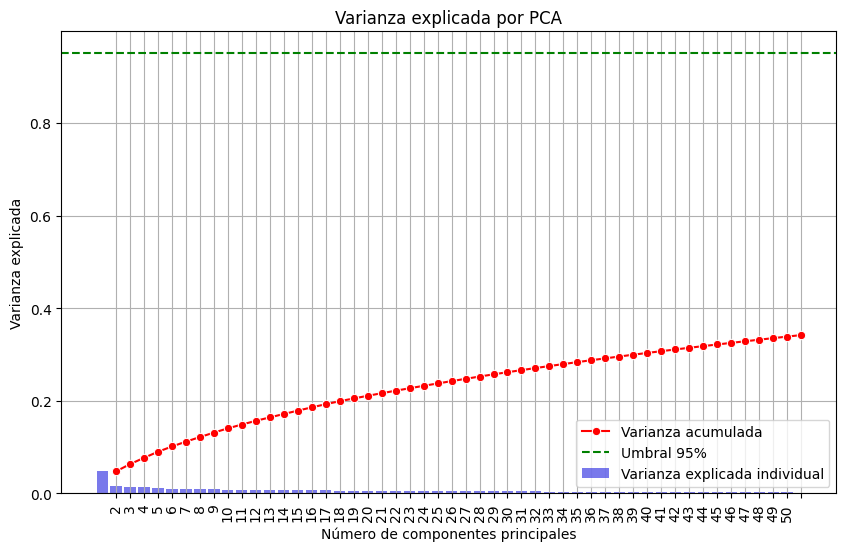

mainDepartment  \
0       Sports and Outdoors   
1                 Computers   
2                 Computers   
3          Home and Kitchen   
4  Beauty and Personal Care   

                                          reviewText  \
0  Nice lightweight brace but unfortunately was t...   
1  Boxers were ok. The color did start to fade pr...   
2  Very easy to install. Worked right away but it...   
3  The color is completely different than hunter ...   
4  From reading the reviews, I was hoping that th...   

                                        cleaned_text  pca_componente_0  \
0  nice lightweight brace unfortunately large wri...         -0.565127   
1  boxer ok color start fade pretty quickly becom...         -0.616673   
2  easy install work right away go far expectedit...         -0.155211   
3  color completely different hunter green andor ...         -0.670184   
4  read review hope shampoo conditioner would ext...          0.031709   

   pca_componente_1  pca_componente_2  pca_componente_3  pca_componente_4  \
0         -0.126623         -0.176573          0.016744         -0.053926   
1         -0.027759         -0.181384          0.117707         -0.052371   
2         -0.334498          0.443099          0.339230          0.011931   
3         -0.021854         -0.097104          0.015842         -0.074700   
4         -0.266230          0.678106          0.060011          0.864072   

   pca_componente_5  pca_componente_6  pca_componente_7  pca_componente_8  \
0         -0.017765         -0.142724         -0.104552          0.127615   
1         -0.016731         -0.078111         -0.029710         -0.020390   
2         -0.307112         -0.297125          0.355214         -0.543002   
3         -0.010740          0.004133         -0.123045          0.118801   
4         -0.050462         -0.078159          0.101026          0.474882   

   pca_componente_9  pca_componente_10  pca_componente_11  pca_componente_12  \
0         -0.096086           0.009746           0.231894          -0.051001   
1          0.098260          -0.004525           0.027937           0.003089   
2          0.164597          -0.478260          -0.033630          -0.072827   
3          0.065133           0.039135           0.093165          -0.025719   
4         -0.260055          -0.761984          -0.642372          -0.195777   

   pca_componente_13  pca_componente_14  pca_componente_15  pca_componente_16  \
0           0.058002          -0.386539          -0.134515          -0.185108   
1           0.155254           0.009552          -0.117591          -0.162443   
2          -0.346569           0.209738          -0.100611          -0.114634   
3          -0.021045          -0.108056          -0.013056          -0.041801   
4           0.294719          -0.591986           0.721005          -0.026519   

   pca_componente_17  pca_componente_18  pca_componente_19  pca_componente_20  \
0           0.489208           0.134154          -0.089696           0.477025   
1          -0.040747          -0.132379           0.115388           0.064525   
2           0.202643          -0.202569          -0.216109          -0.116582   
3          -0.062109          -0.048735           0.084565          -0.118841   
4          -0.131534           0.116368          -0.069226          -0.092876   

   pca_componente_21  pca_componente_22  pca_componente_23  pca_componente_24  \
0           0.303184          -0.016556           0.234172           0.132829   
1           0.071765          -0.047297           0.080272          -0.101198   
2          -0.258005          -0.111868          -0.188532          -0.051428   
3          -0.066859          -0.125005           0.114883           0.086279   
4           0.031487          -0.009238          -0.155663          -0.289607   

   pca_componente_25  pca_componente_26  pca_componente_27  pca_componente_28  \
0          -0.365652          -0.173928           0.346721           0.291394   
1           0.

In [11]:
# Seleccionar columnas numéricas para reducir
columnas_a_reducir_bow = bow_df.columns.difference(['reviewText', 'mainDepartment', 'cleaned_text'])


# Aplicar reducción de dimensionalidad
df_reducido_bow = reductor_pca.ajustar_transformar(bow_df, columnas_a_reducir_bow)

# Mostrar la varianza explicada por los componentes principales
varianza_acumulada_bow = reductor_pca.explicar_varianza(mostrar_grafico=True)

# El DataFrame 'df_reducido' contiene las nuevas columnas reducidas como 'pca_componente_0', ..., 'pca_componente_49'
df_reducido_bow.head()

Aplicando PCA para reducir 5000 dimensiones a 50 dimensiones...
Reducción completada. Nuevas dimensiones agregadas al DataFrame.


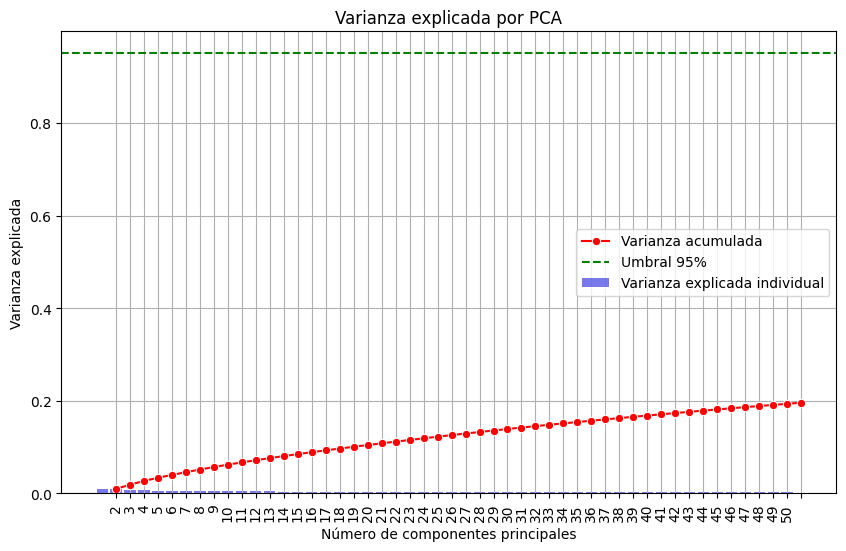

mainDepartment  \
0       Sports and Outdoors   
1                 Computers   
2                 Computers   
3          Home and Kitchen   
4  Beauty and Personal Care   

                                          reviewText  \
0  Nice lightweight brace but unfortunately was t...   
1  Boxers were ok. The color did start to fade pr...   
2  Very easy to install. Worked right away but it...   
3  The color is completely different than hunter ...   
4  From reading the reviews, I was hoping that th...   

                                        cleaned_text  pca_componente_0  \
0  nice lightweight brace unfortunately large wri...         -0.072776   
1  boxer ok color start fade pretty quickly becom...         -0.047272   
2  easy install work right away go far expectedit...          0.098811   
3  color completely different hunter green andor ...         -0.039112   
4  read review hope shampoo conditioner would ext...          0.067082   

   pca_componente_1  pca_componente_2  pca_componente_3  pca_componente_4  \
0         -0.048523         -0.003406         -0.117267          0.064424   
1          0.004798          0.015628         -0.048557          0.014823   
2          0.182996         -0.097026          0.003197         -0.066576   
3         -0.037838          0.002516         -0.032798          0.026594   
4         -0.029712         -0.061510          0.051491          0.033755   

   pca_componente_5  pca_componente_6  pca_componente_7  pca_componente_8  \
0         -0.032279          0.089220          0.122793          0.106488   
1          0.008425         -0.017136         -0.018640          0.041596   
2          0.104099         -0.069987          0.117478          0.031472   
3          0.022227         -0.011193         -0.013310          0.030532   
4         -0.031781          0.012408          0.039387         -0.032893   

   pca_componente_9  pca_componente_10  pca_componente_11  pca_componente_12  \
0         -0.045377          -0.087470           0.092419           0.043385   
1          0.046194          -0.014215          -0.059600          -0.020318   
2         -0.002218          -0.001919          -0.112576          -0.024718   
3          0.022288          -0.019240          -0.039898          -0.002698   
4          0.162492           0.060758           0.034076           0.161683   

   pca_componente_13  pca_componente_14  pca_componente_15  pca_componente_16  \
0           0.009139          -0.030581          -0.021488           0.020615   
1           0.055791           0.035681           0.005045          -0.010452   
2           0.002797          -0.085045          -0.005891          -0.006124   
3          -0.022502           0.025404           0.014237          -0.015265   
4          -0.005215           0.026367          -0.024730           0.020434   

   pca_componente_17  pca_componente_18  pca_componente_19  pca_componente_20  \
0           0.004847          -0.010063           0.016216          -0.002025   
1          -0.038159          -0.007103          -0.003454          -0.067483   
2          -0.171178           0.011118           0.176216           0.023883   
3           0.020192          -0.012156          -0.020894          -0.017329   
4          -0.014738           0.080525          -0.004228          -0.016544   

   pca_componente_21  pca_componente_22  pca_componente_23  pca_componente_24  \
0          -0.051418           0.006590          -0.015842          -0.012689   
1           0.013702           0.262360           0.077062           0.098457   
2           0.098377          -0.032170          -0.056701          -0.121614   
3           0.031170          -0.006529           0.010021          -0.043593   
4          -0.016885          -0.004651           0.016144           0.004015   

   pca_componente_25  pca_componente_26  pca_componente_27  pca_componente_28  \
0           0.018584           0.034202           0.006860          -0.003872   
1          -0.

In [12]:
# Seleccionar columnas numéricas para reducir
columnas_a_reducir_tf = bow_df.columns.difference(['reviewText', 'mainDepartment', 'cleaned_text'])


# Aplicar reducción de dimensionalidad
df_reducido_tf = reductor_pca.ajustar_transformar(tfidf_df, columnas_a_reducir_tf)

# Mostrar la varianza explicada por los componentes principales
varianza_acumulada_tf = reductor_pca.explicar_varianza(mostrar_grafico=True)

# El DataFrame 'df_reducido' contiene las nuevas columnas reducidas como 'pca_componente_0', ..., 'pca_componente_49'
df_reducido_tf.head()

In [14]:
# Crear un diccionario de mapeo
valores_unicos = df_reducido_emb['mainDepartment'].unique()
mapear_status = {value: i for i, value in enumerate(valores_unicos)}
df_reducido_emb["mainDepartment"] = df_reducido_emb["mainDepartment"].map(mapear_status)

X = df_reducido_emb.iloc[:, 3:]
y = df_reducido_emb["mainDepartment"]

In [15]:
clasificador = sn.ClasificacionTextoAvanzada(modelo="random_forest")

X_train, X_test, y_train, y_test = clasificador.dividir_datos(X, y, test_size=0.3)

# Entrenamiento
clasificador.entrenar(X_train, y_train)

# Validación cruzada
clasificador.validar(X_train, y_train)

parametros = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

clasificador.ajustar_hyperparametros(X_train, y_train, parametros)

Dividiendo datos: 30.0% para prueba.
Tamaño del conjunto de entrenamiento: 7000
Tamaño del conjunto de prueba: 3000
Entrenando modelo...
Modelo entrenado.
Realizando validación cruzada...
Puntuaciones de validación cruzada: [0.55802277 0.55846892 0.55479117 0.56488659 0.54753198]
Puntuación media: 0.5567
Buscando los mejores hiperparámetros...
Mejores parámetros encontrados: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Modelo actualizado con los mejores parámetros.


In [16]:
df_limpio.head()

mainDepartment  \
0       Sports and Outdoors   
1                 Computers   
2                 Computers   
3          Home and Kitchen   
4  Beauty and Personal Care   

                                          reviewText  \
0  Nice lightweight brace but unfortunately was t...   
1  Boxers were ok. The color did start to fade pr...   
2  Very easy to install. Worked right away but it...   
3  The color is completely different than hunter ...   
4  From reading the reviews, I was hoping that th...   

                                        cleaned_text  
0  nice lightweight brace unfortunately large wri...  
1  boxer ok color start fade pretty quickly becom...  
2  easy install work right away go far expectedit...  
3  color completely different hunter green andor ...  
4  read review hope shampoo conditioner would ext...

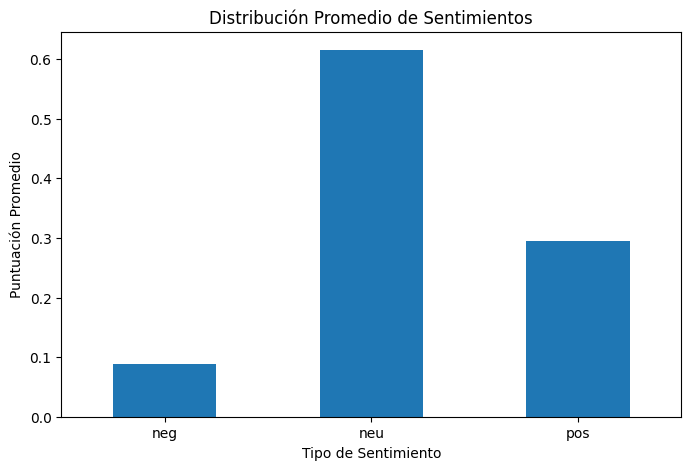

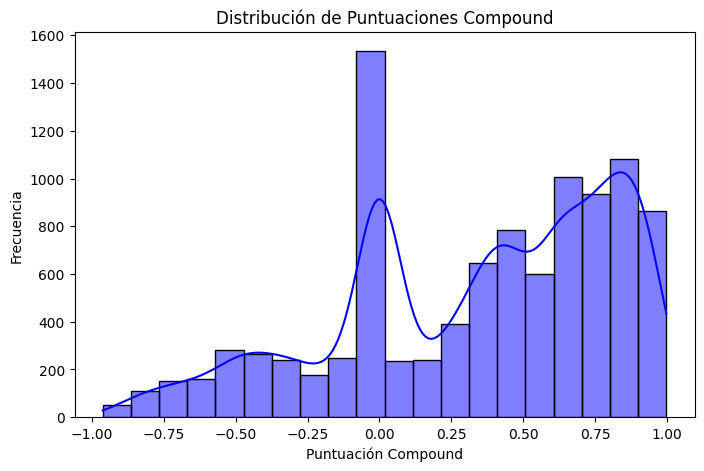

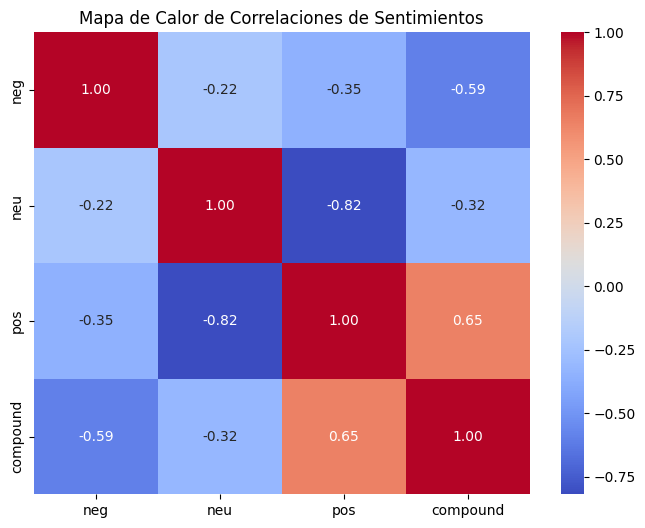

In [17]:
# Instanciar la clase
analisis_sentimientos = sn.AnalisisSentimientos(df_limpio, columna_texto='cleaned_text')

# Generar gráficos
analisis_sentimientos.graficar_distribucion_sentimientos() 
analisis_sentimientos.graficar_distribucion_compound()
analisis_sentimientos.graficar_mapa_calor_sentimientos()